In [1]:
#Vil vurdere å dele inn datasetet i 10 klasser og ikke 99. Forventer mye av modellen vår, men ikke at den 
#er så mye bedre enn en et menneske til å predikere eksakt alder. Ser derfor på om den kan se hvilket 10år 
def classify(num):
    if(num > 100):
        return 10
    return num//10

In [2]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import numpy as np

IMAGE_SIZE = (150,150)

x = []
y = []

folder = './train'
set = os.listdir(folder)
num_classes = 0

for i in set:
    num_classes += 1
    for file in os.listdir(f"{folder}/{i}"):
        if file[-4:]=='.jpg':
            image=keras.preprocessing.image.load_img(f"{folder}/{i}/{file}", grayscale=False, color_mode='rgb', target_size=(150,150))
            x_arr = keras.preprocessing.image.img_to_array(image)
            y.append(classify(int(i[-3:])))
            x.append(x_arr)
#print(f"Det er {num_classes} klasser")
print(len(x))
print(len(y))

8651
8651


In [3]:
import os
x_test = []
y_test = []

folder = './test'
set = os.listdir(folder)
for i in set:
    for file in os.listdir(f"{folder}/{i}"):
        if file[-4:]=='.jpg':
            image=keras.preprocessing.image.load_img(f"{folder}/{i}/{file}", grayscale=False, color_mode='rgb', target_size=(150,150))
            x_arr = keras.preprocessing.image.img_to_array(image)
            y_test.append(classify(int(i[-3:])))
            x_test.append(x_arr)
print(len(x_test))
len(x_test)

3292


3292

In [4]:
x = np.asarray(x)
y = np.asarray(y)
x = x.astype('float32')
x /= 255.0

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
x_test = x_test.astype('float32')
x_test /= 255.0

print('Min: %.3f, Max: %.3f' % (x.min(), x.max()))
print('Min: %.3f, Max: %.3f' % (x_test.min(), x_test.max()))

Min: 0.000, Max: 1.000
Min: 0.000, Max: 1.000


In [5]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(8651, 150, 150, 3)
(8651,)
(3292, 150, 150, 3)
(3292,)


6


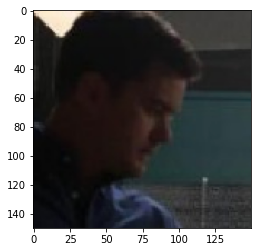

In [6]:
import matplotlib.pyplot as plt
#Se et tilfeldig bilde sammen med alder slik at innlesing stemmer
test = tf.keras.preprocessing.image.array_to_img(x[6300])
plt.imshow(test)
print(y[6300])

In [7]:
from tensorflow.keras import layers
from tensorflow import keras
def build_model():
    return keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(11, activation='softmax')
])

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
epochs = 50
batch_size= 64
steps_per_epoch = len(x) // batch_size
print(len(x))

ant_bilder = batch_size * steps_per_epoch
print(f"Det produseres {ant_bilder} bilder i hver epoch")

8651
Det produseres 8640 bilder i hver epoch


In [9]:
model = build_model()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_history = model.fit(
            x,y,
            #batch_size=batch_size,
            #steps_per_epoch = steps_per_epoch,
            validation_data = (x_test,y_test),
            epochs = epochs,
            verbose=True)

#model.evaluate() Kan brukes for å sjekke modellen, men det er nok bedre å gjøre det direkte i mo del_fit.

Epoch 1/50
271/271 [==============================] - 115s 425ms/step - loss: 2.0451 - accuracy: 0.2143 - val_loss: 2.2022 - val_accuracy: 0.2151
Epoch 2/50
271/271 [==============================] - 114s 423ms/step - loss: 1.8747 - accuracy: 0.2708 - val_loss: 2.1562 - val_accuracy: 0.2230
Epoch 3/50
271/271 [==============================] - 111s 408ms/step - loss: 1.7750 - accuracy: 0.3193 - val_loss: 2.1664 - val_accuracy: 0.2357
Epoch 4/50
271/271 [==============================] - 111s 409ms/step - loss: 1.6457 - accuracy: 0.3763 - val_loss: 2.2825 - val_accuracy: 0.2503
Epoch 5/50
271/271 [==============================] - 108s 398ms/step - loss: 1.3922 - accuracy: 0.4858 - val_loss: 2.3124 - val_accuracy: 0.2527
Epoch 6/50
271/271 [==============================] - 107s 395ms/step - loss: 0.8985 - accuracy: 0.6773 - val_loss: 3.0140 - val_accuracy: 0.2388
Epoch 7/50
271/271 [==============================] - 109s 403ms/step - loss: 0.3797 - accuracy: 0.8777 - val_loss: 4.7909 -

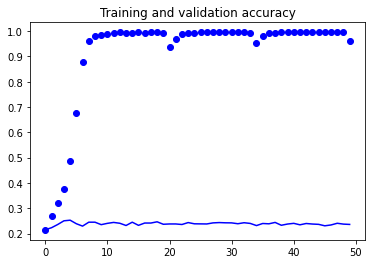

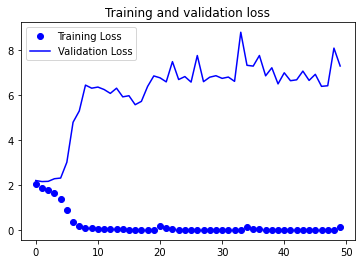

In [10]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
def test_model(model, image_path):
    image = keras.preprocessing.image.load_img(image_path, grayscale=False, color_mode='rgb',
                                               target_size=(150, 150))
    img_array = keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)
    img_array = np.asarray(img_array)
    img_array = img_array.astype('float32')
    img_array = img_array//255.0
    predictions = model.predict(img_array)
    print('Min: %.3f, Max: %.3f' % (img_array.min(), img_array.max()))
    print(np.argmax(predictions))